# 使用马尔科夫猜想构建的模型

## 准备数据

生成时间相关的一些数据

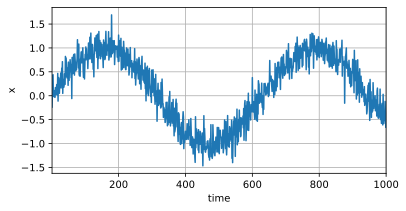

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
# sin函数上加一些正态分布的噪音
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

> 使用马尔科夫猜测，t时刻只和之前τ个数据相关

In [2]:
# 设τ=4
tau = 4
# 那T时刻的前τ个数据可以作为特征，有T-τ行个样本，每个样本τ个特征
features = torch.zeros((T - tau, tau))
for i in range(tau):
    # 按列赋值，每列T-τ行
    features[:, i] = x[i: T - tau + i]
# reshape转成二维的
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

torch.Size([996, 1])